In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime, timedelta

In [6]:
'''
1 - Abri o arquivo na forma de DataFrame
2 - Como o arquivo veio com uma coluna apenas, transformei em 7 colunas
3 - Deletei a coluna única
'''

file = pd.read_csv('COVID19.csv')
file['regiao'],file['estado'],file['data'],file['casosNovos'],file['casosAcumulados'],file['obitosNovos'],file['obitosAcumulados']= file['regiao;estado;data;casosNovos;casosAcumulados;obitosNovos;obitosAcumulados'].str.split(";", 7).str

del file['regiao;estado;data;casosNovos;casosAcumulados;obitosNovos;obitosAcumulados']

<h1>Casos diários de COVID-19 no Brasil </h1>

In [7]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['data','casosNovos'])
microDados['casosNovos'] = microDados.casosNovos.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [8]:
dados = microDados.groupby('data').sum()

In [9]:
casos = list(dados['casosNovos'])
casos = sorted(casos)

In [11]:
microDados['data'].drop_duplicates(inplace=True)

In [12]:
microDados['data'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: data, Length: 73, dtype: bool

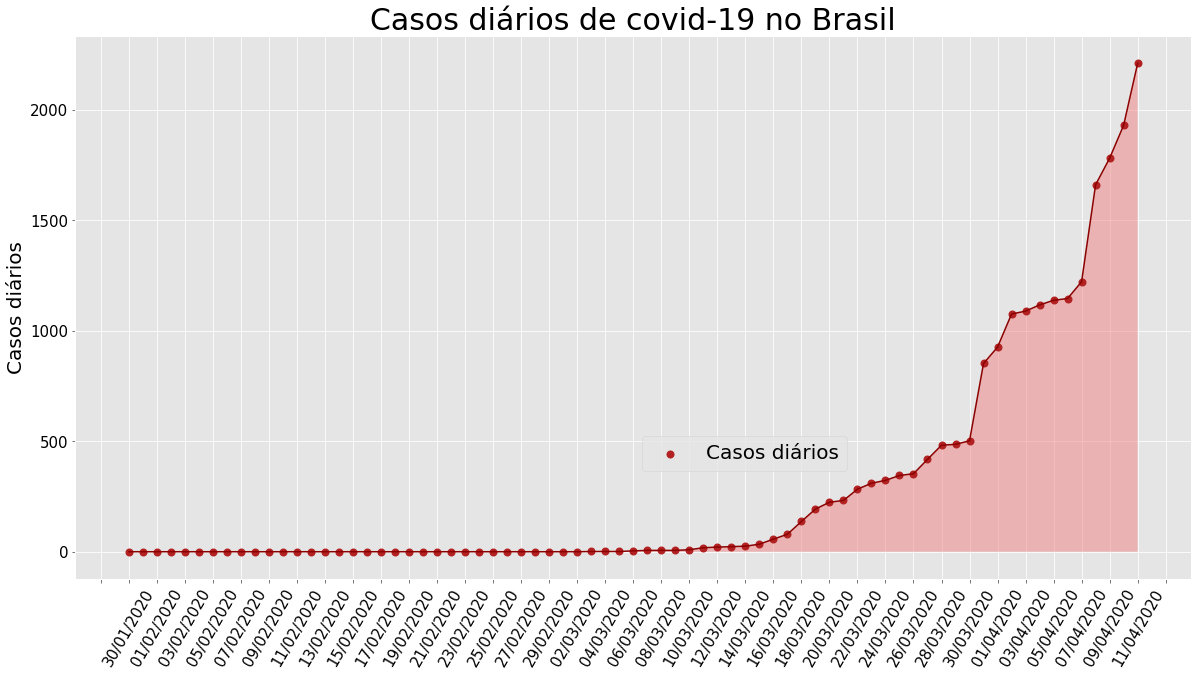

In [13]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

#plt.bar(microDados['date'],y, color = 'lightcoral')
plt.plot(microDados['data'],casos, color = 'darkred')
plt.fill_between(microDados['data'],casos,facecolor='lightcoral', alpha=0.5)
plt.scatter(microDados['data'],casos, color = 'firebrick',linewidths=2, label = 'Casos diários')

plt.title('Casos diários de covid-19 no Brasil',size=30)
plt.ylabel('Casos diários',color='black',size=20)
plt.xticks(rotation=60,size=15,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('casos-diarios.png')
plt.show()

<h1>Total de casos de COVID-19 no Brasil </h1>

In [16]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['data','casosAcumulados'])
microDados['casosAcumulados'] = microDados.casosAcumulados.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [17]:
dados = microDados.groupby('data').sum()

In [18]:
casos = list(dados['casosAcumulados'])
casos = sorted(casos)

In [20]:
microDados['data'].drop_duplicates(inplace=True)

In [21]:
microDados['data'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: data, Length: 73, dtype: bool

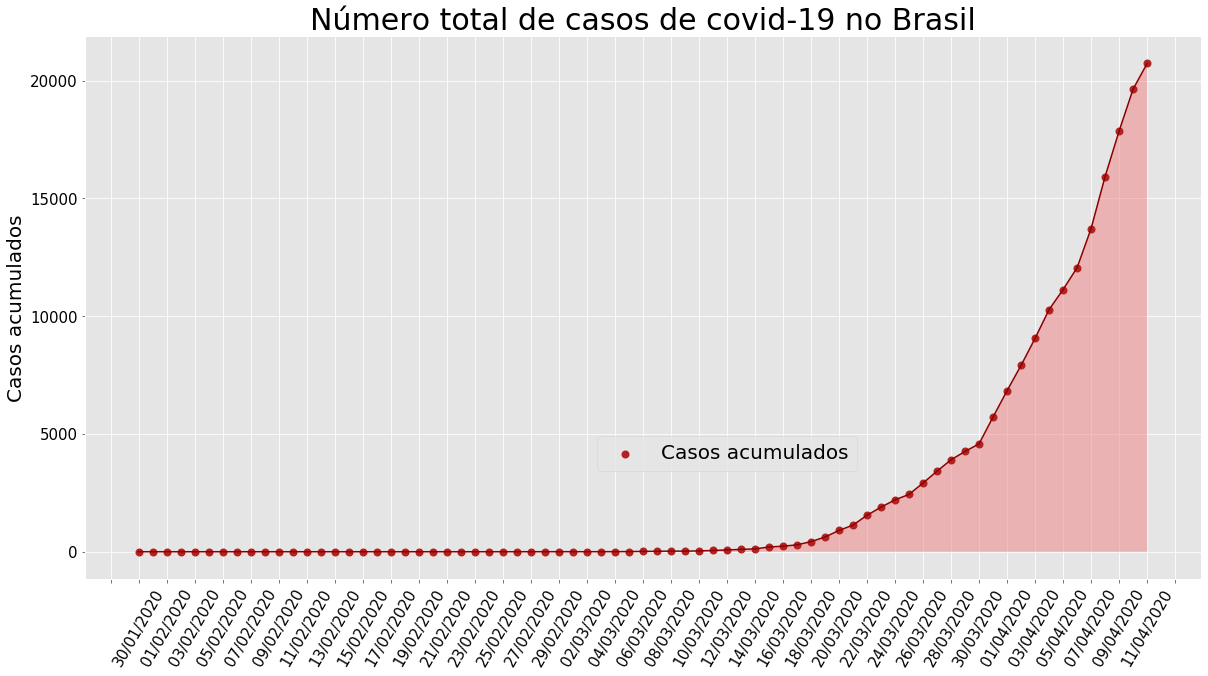

In [22]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

#plt.bar(microDados['date'],y, color = 'lightcoral')
plt.plot(microDados['data'],casos, color = 'darkred')
plt.fill_between(microDados['data'],casos,facecolor='lightcoral', alpha=0.5)
plt.scatter(microDados['data'],casos, color = 'firebrick',linewidths=2, label = 'Casos acumulados')

plt.title('Número total de casos de covid-19 no Brasil',size=30)
plt.ylabel('Casos acumulados',color='black',size=20)
plt.xticks(rotation=60,size=15,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('casos-acumulados.png')
plt.show()

<h1>Mortes diárias por COVID-19 no Brasil </h1>

In [23]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['data','obitosNovos'])
microDados['obitosNovos'] = microDados.obitosNovos.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [25]:
dados = microDados.groupby('data').sum()

In [26]:
mortes = list(dados['obitosNovos'])
mortes = sorted(mortes)

In [27]:
microDados['data'].drop_duplicates(inplace=True)

In [28]:
microDados['data'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: data, Length: 73, dtype: bool

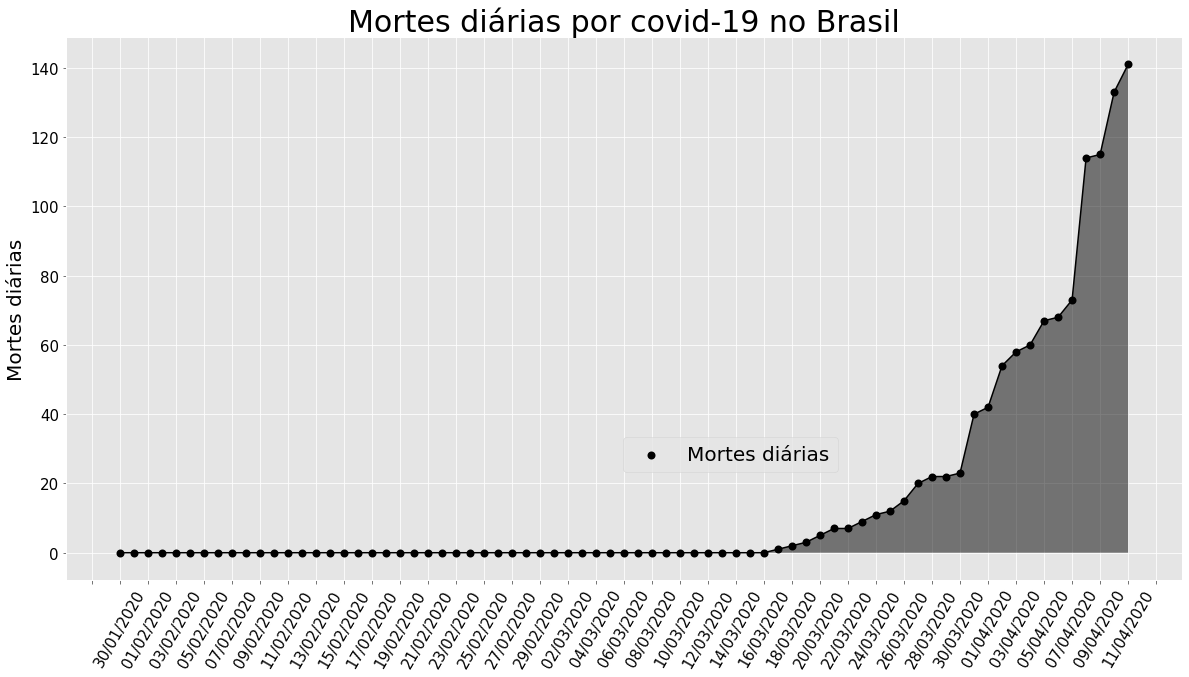

In [29]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

#plt.bar(microDados['date'],y, color = 'lightcoral')
plt.plot(microDados['data'],mortes, color = 'black')
plt.fill_between(microDados['data'],mortes,facecolor='black', alpha=0.5)
plt.scatter(microDados['data'],mortes, color = 'black',linewidths=2, label = 'Mortes diárias')

plt.title('Mortes diárias por covid-19 no Brasil',size=30)
plt.ylabel('Mortes diárias',color='black',size=20)
plt.xticks(rotation=60,size=15,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('mortes-diarias.png')
plt.show()

<h1>Total de mortes por COVID-19 no Brasil </h1>

In [30]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['data','obitosAcumulados'])
microDados['obitosAcumulados'] = microDados.obitosAcumulados.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [31]:
dados = microDados.groupby('data').sum()

In [32]:
dados

obitosAcumulados
data                        
01/02/2020                 0
01/03/2020                 0
01/04/2020               241
02/02/2020                 0
02/03/2020                 0
...                      ...
29/03/2020               136
30/01/2020                 0
30/03/2020               159
31/01/2020                 0
31/03/2020               201

[73 rows x 1 columns]

In [34]:
mortes = list(dados['obitosAcumulados'])
mortes = sorted(mortes)

In [35]:
microDados['data'].drop_duplicates(inplace=True)

In [39]:
microDados['data'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: data, Length: 73, dtype: bool

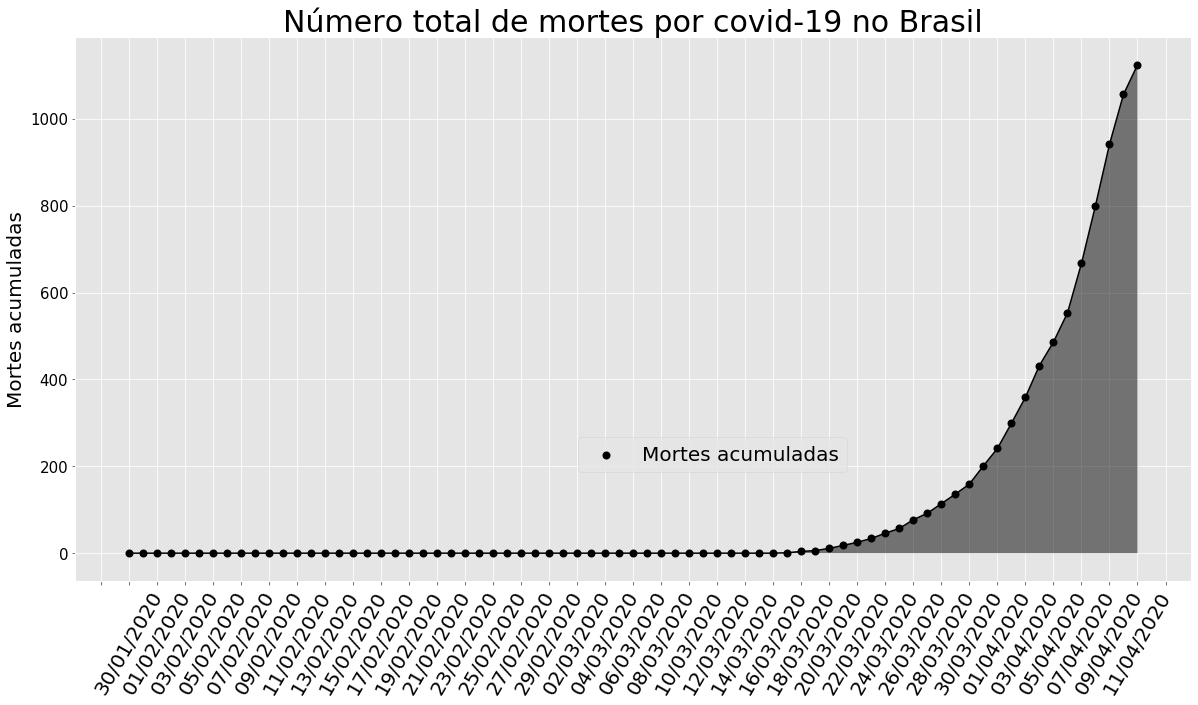

In [41]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

plt.plot(microDados['data'],mortes, color = 'black')
plt.fill_between(microDados['data'],mortes,facecolor='black', alpha=0.5)
plt.scatter(microDados['data'],mortes, color = 'black',linewidths=2, label = 'Mortes acumuladas')

plt.title('Número total de mortes por covid-19 no Brasil',size=30)
plt.ylabel('Mortes acumuladas',color='black',size=20)
plt.xticks(rotation=60,size=20,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('mortes-acumuladas.png')
plt.show()

<h1>Casos e mortes diárias de covid-19 no Brasil</h1>

In [42]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['data','obitosNovos','casosNovos'])
microDados['obitosNovos'] = microDados.obitosNovos.astype('int64')
microDados['casosNovos'] = microDados.casosNovos.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [43]:
dados = microDados.groupby('data').sum()

In [44]:
dados

obitosNovos  casosNovos
data                               
01/02/2020            0           0
01/03/2020            0           0
01/04/2020           40        1117
02/02/2020            0           0
02/03/2020            0           0
...                 ...         ...
29/03/2020           22         353
30/01/2020            0           0
30/03/2020           23         323
31/01/2020            0           0
31/03/2020           42        1138

[73 rows x 2 columns]

In [45]:
mortes = list(dados['obitosNovos'])
mortes = sorted(mortes)

In [46]:
casos = list(dados['casosNovos'])
casos = sorted(casos)

In [47]:
microDados['data'].drop_duplicates(inplace=True)

In [48]:
microDados['data'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: data, Length: 73, dtype: bool

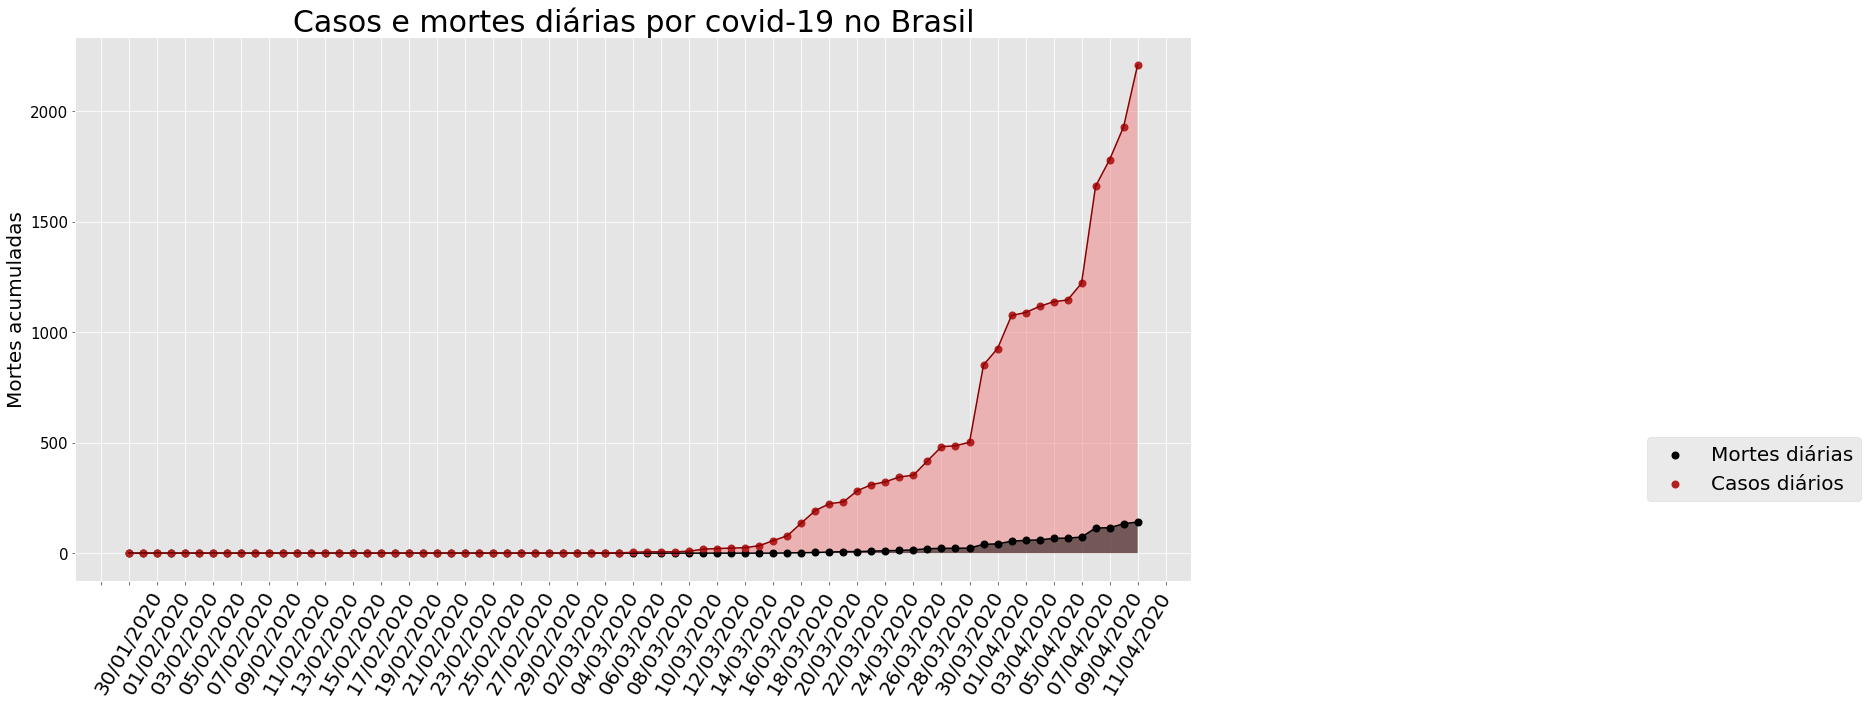

In [49]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

#plt.bar(microDados['date'],y, color = 'lightcoral')
plt.plot(microDados['data'],mortes, color = 'black')
plt.plot(microDados['data'],casos, color = 'darkred')
plt.fill_between(microDados['data'],casos,facecolor='lightcoral', alpha=0.5)
plt.fill_between(microDados['data'],mortes,facecolor='black', alpha=0.5)
plt.scatter(microDados['data'],mortes, color = 'black',linewidths=2, label = 'Mortes diárias')
plt.scatter(microDados['data'],casos, color = 'firebrick',linewidths=2, label = 'Casos diários')

plt.title('Casos e mortes diárias por covid-19 no Brasil',size=30)
plt.ylabel('Mortes acumuladas',color='black',size=20)
plt.xticks(rotation=60,size=20,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('casos-mortes-diarias.png')
plt.show()

<h1>Total de mortes e casos de covid-19 no Brasil</h1>

In [52]:
'''
1 - Pegando as colunas de interesse
2 - Transformando o número de mortes em inteiros
3 - Transformando as datas em dates
'''

microDados = file.filter(items=['data','obitosAcumulados','casosAcumulados'])
microDados['obitosAcumulados'] = microDados.obitosAcumulados.astype('int64')
microDados['casosAcumulados'] = microDados.casosAcumulados.astype('int64')
#microDados['date'] = microDados.date.astype('datetime64[D]')

In [53]:
dados = microDados.groupby('data').sum()

In [54]:
dados

obitosAcumulados  casosAcumulados
data                                         
01/02/2020                 0                0
01/03/2020                 0                2
01/04/2020               241             6834
02/02/2020                 0                0
02/03/2020                 0                2
...                      ...              ...
29/03/2020               136             4256
30/01/2020                 0                0
30/03/2020               159             4579
31/01/2020                 0                0
31/03/2020               201             5717

[73 rows x 2 columns]

In [56]:
mortes = list(dados['obitosAcumulados'])
mortes = sorted(mortes)

In [57]:
casos = list(dados['casosAcumulados'])
casos = sorted(casos)

In [58]:
microDados['data'].drop_duplicates(inplace=True)

In [59]:
microDados['data'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: data, Length: 73, dtype: bool

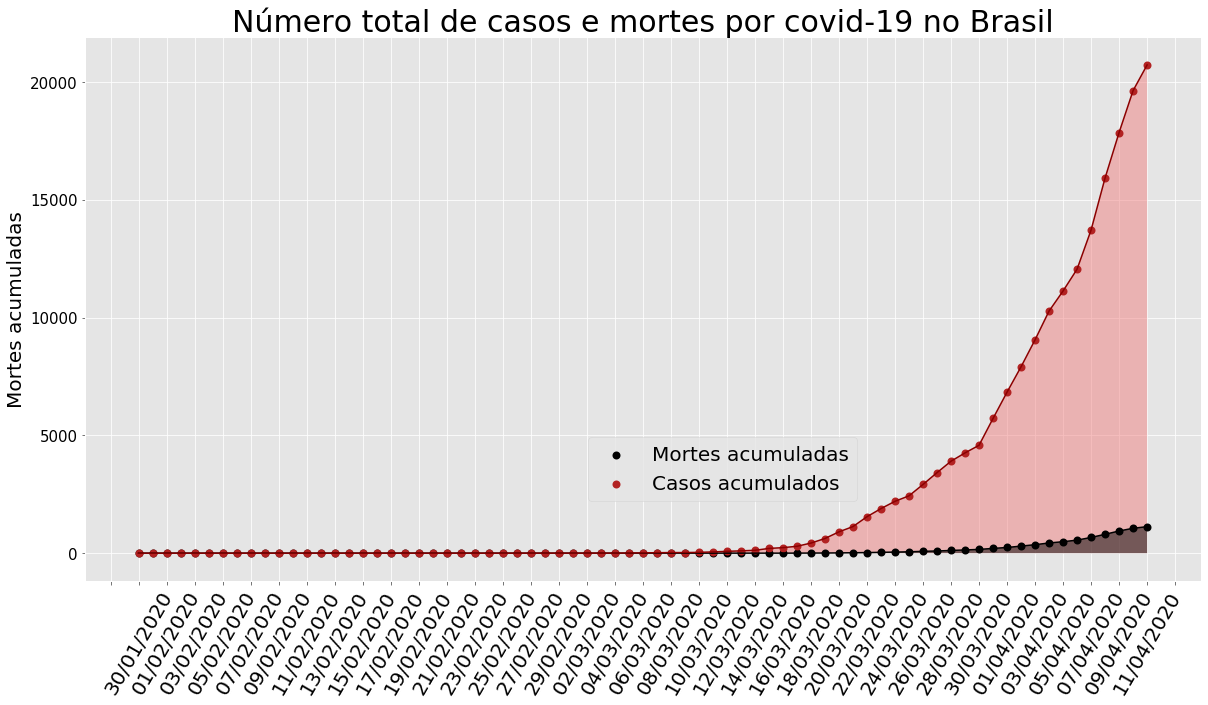

In [60]:
plt.figure(figsize = (20,10))
plt.style.use('ggplot')

#plt.bar(microDados['date'],y, color = 'lightcoral')
plt.plot(microDados['data'],mortes, color = 'black')
plt.plot(microDados['data'],casos, color = 'darkred')
plt.fill_between(microDados['data'],casos,facecolor='lightcoral', alpha=0.5)
plt.fill_between(microDados['data'],mortes,facecolor='black', alpha=0.5)
plt.scatter(microDados['data'],mortes, color = 'black',linewidths=2, label = 'Mortes acumuladas')
plt.scatter(microDados['data'],casos, color = 'firebrick',linewidths=2, label = 'Casos acumulados')

plt.title('Número total de casos e mortes por covid-19 no Brasil',size=30)
plt.ylabel('Mortes acumuladas',color='black',size=20)
plt.xticks(rotation=60,size=20,color='black')
plt.yticks(size=15,color='black')
plt.rcParams.update({'font.size': 20})

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

#plt.grid(axis='y',color='dimgrey')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=20)
plt.savefig('casos-mortes-acumuladas.png')
plt.show()